In [27]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
import pandas as pd

In [28]:
# Reading the file row by row
# Saving each row in a different list
def readCSV(filePath):
    
    folder = []
    with open(filePath, newline = '') as file:
        reader = csv.reader(file)
        for row in reader:
            dataset = [float(value) for value in row if value != '']
            folder.append(dataset)
    return folder

# EXECUTION TIME

In [29]:
# File's path
filePath = "datasets/executionTimesColumn.csv"

# Reading file
folderColumn = readCSV(filePath)

In [30]:
# Creating a new list
# Each element of the list is a new list
# Each internal list contains the ratio between the sequential time and the parallel time with a specific number fo threads
modifiedFolderColumn = []

for i in range(len(folderColumn)):
   modifiedFolderInternal = []
   for j in range(len(folderColumn[i])):
       value = folderColumn[i][0] / folderColumn[i][j]
       modifiedFolderInternal.append(value)
   modifiedFolderColumn.append(modifiedFolderInternal)

In [31]:
# File's path
filePath = "datasets/executionTimesMatrix.csv"

# Reading file
folderMatrix = readCSV(filePath)

In [32]:
# Creating a new list
# Each element of the list is a new list
# Each internal list contains the ratio between the sequential time and the parallel time with a specific number fo threads
modifiedFolderMatrix = []

for i in range(len(folderMatrix)):
   modifiedFolderInternal = []
   for j in range(len(folderMatrix[i])):
       value = folderMatrix[i][0] / folderMatrix[i][j]
       modifiedFolderInternal.append(value)
   modifiedFolderMatrix.append(modifiedFolderInternal)

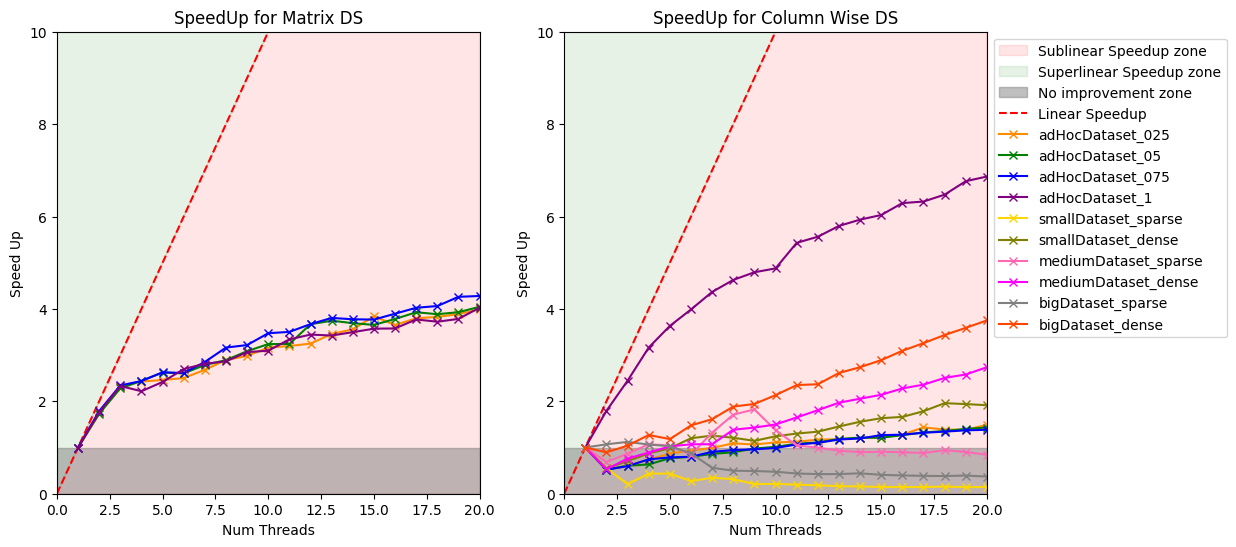

In [33]:
# Auxiliary variables
nThreads = range(1, 21); 
x_fill = np.linspace(0, 20)
y_fill = x_fill
bisectorRange = range(0, 11)

# Dividing the space
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figheight(6)
fig.set_figwidth(12)

# COLUMN WISE

# Visualizing the background of the plot
ax1.fill_between(x_fill, y_fill, color = 'red', alpha = 0.1, label = 'Sublinear Speedup zone')
ax1.fill_between(x_fill, y_fill, 10, color = 'green', alpha = 0.1, label='Superlinear Speedup zone')
ax1.fill_between(x_fill, [0], [1], color = 'grey', alpha = 0.5, label = 'No improvement zone')
ax1.set_xlim(0, 20)
ax1.set_ylim(0, 10)

# Visualizing the trends of the Speedup for each dataset
ax1.plot(bisectorRange, bisectorRange, color = 'red', linestyle = 'dashed', label = 'Linear Speedup', zorder = 2)
ax1.plot(nThreads, modifiedFolderMatrix[0], color = '#ff8c00', marker = 'x', linestyle = '-', label = 'adHocDataset_025', zorder = 2)
ax1.plot(nThreads, modifiedFolderMatrix[1], color = '#008000', marker = 'x', linestyle = '-', label = 'adHocDataset_05', zorder = 2)
ax1.plot(nThreads, modifiedFolderMatrix[2], color = '#0000ff', marker = 'x', linestyle = '-', label = 'adHocDataset_075', zorder = 2)
ax1.plot(nThreads, modifiedFolderMatrix[3], color = '#800080', marker = 'x', linestyle = '-', label = 'adHocDataset_1', zorder = 2)


# Specifying labels
ax1.set_xlabel('Num Threads')
ax1.set_ylabel('Speed Up')
ax1.set_title("SpeedUp for Matrix DS")


# MATRIX

# Visualizing the background of the plot
ax2.fill_between(x_fill, y_fill, color = 'red', alpha = 0.1, label = 'Sublinear Speedup zone')
ax2.fill_between(x_fill, y_fill, 10, color = 'green', alpha = 0.1, label='Superlinear Speedup zone')
ax2.fill_between(x_fill, [0], [1], color = 'grey', alpha = 0.5, label = 'No improvement zone')
ax2.set_xlim(0, 20)
ax2.set_ylim(0, 10)

# Visualizing the trends of the Speedup for each dataset
ax2.plot(bisectorRange, bisectorRange, color = 'red', linestyle = 'dashed', label = 'Linear Speedup', zorder = 2)
ax2.plot(nThreads, modifiedFolderColumn[0], color = '#ff8c00', marker = 'x', linestyle = '-', label = 'adHocDataset_025', zorder = 2)
ax2.plot(nThreads, modifiedFolderColumn[1], color = '#008000', marker = 'x', linestyle = '-', label = 'adHocDataset_05', zorder = 2)
ax2.plot(nThreads, modifiedFolderColumn[2], color = '#0000ff', marker = 'x', linestyle = '-', label = 'adHocDataset_075', zorder = 2)
ax2.plot(nThreads, modifiedFolderColumn[3], color = '#800080', marker = 'x', linestyle = '-', label = 'adHocDataset_1', zorder = 2)
ax2.plot(nThreads, modifiedFolderColumn[4], color = '#ffd700', marker = 'x', linestyle = '-', label = 'smallDataset_sparse', zorder = 2)
ax2.plot(nThreads, modifiedFolderColumn[5], color = '#808000', marker = 'x', linestyle = '-', label = 'smallDataset_dense', zorder = 2)
ax2.plot(nThreads, modifiedFolderColumn[6], color = '#ff69b4', marker = 'x', linestyle = '-', label = 'mediumDataset_sparse', zorder = 2)
ax2.plot(nThreads, modifiedFolderColumn[7], color = '#ff00ff', marker = 'x', linestyle = '-', label = 'mediumDataset_dense', zorder = 2)
ax2.plot(nThreads, modifiedFolderColumn[8], color = '#808080', marker = 'x', linestyle = '-', label = 'bigDataset_sparse', zorder = 2)
ax2.plot(nThreads, modifiedFolderColumn[9], color = '#ff4500', marker = 'x', linestyle = '-', label = 'bigDataset_dense', zorder = 2)

# Specifying labels
ax2.set_xlabel('Num Threads')
ax2.set_ylabel('Speed Up')
ax2.set_title("SpeedUp for Column Wise DS")


ax2.legend(loc = 'upper left', bbox_to_anchor = (1, 1))
plt.show()



# EXECUTION TIME MATRIX

# TABLE WITH THREAD TIME COLUMN

In [34]:
# Leggi il file CSV
threadTimesColumn = readCSV("datasets/threadTimesColumn.csv")

# Creating a list of pairs
# Each first value of the pairs is equal to the minimum gap 
# Each second value of the pairs is equal to the maximum gap
threadGapsColumn = []
for i in range(len(threadTimesColumn)):
    finalPair = (threadTimesColumn[i][3], threadTimesColumn[i][2])
    for j in range(2, len(threadTimesColumn[i]) - 1, 2):
        pair = (threadTimesColumn[i][j], threadTimesColumn[i][j + 1])
        if(finalPair[1] - finalPair[0] < pair[1] - pair[0]):
            finalPair = pair
    threadGapsColumn.append(finalPair)

In [35]:
# Dividing the minimum and the maximum gap
minTimeThreadsColumn = []
maxTimeThreadsColumn = []
for i in range(len(threadGapsColumn)):
   minTimeThreadsColumn.append(threadGapsColumn[i][0])
   maxTimeThreadsColumn.append(threadGapsColumn[i][1]) 

# List of datasets' names
datasetsColumn = ['adHocDataset_025', 'adHocDataset_05', 'adHocDataset_075', 'adHocDataset_1', 
            'smallDataset_sparse', 'smallDataset_dense', 
            'mediumDataset_sparse','mediumDataset_dense', 
            'bigDataset_sparse', 'bigDataset_dense']

In [36]:
# Creating the data for the table
dataColumn = []
for i in range(len(datasetsColumn)):
    row = [datasetsColumn[i], minTimeThreadsColumn[i], maxTimeThreadsColumn[i]]
    dataColumn.append(row)

# Creating the table
colNames = ['Dataset Name', 'Min Gap Time Thread x Column Wise', 'Max Gap Time Thread x Column Wise']
print(tabulate(dataColumn, headers = colNames, tablefmt = "grid"))

+----------------------+-------------------------------------+-------------------------------------+
| Dataset Name         |   Min Gap Time Thread x Column Wise |   Max Gap Time Thread x Column Wise |
+======================+=====================================+=====================================+
| adHocDataset_025     |                          0.170802   |                          0.247788   |
+----------------------+-------------------------------------+-------------------------------------+
| adHocDataset_05      |                          0.32728    |                          0.495546   |
+----------------------+-------------------------------------+-------------------------------------+
| adHocDataset_075     |                          0.350831   |                          0.597156   |
+----------------------+-------------------------------------+-------------------------------------+
| adHocDataset_1       |                          0.159753   |                          0.2

# TABLE WITH THREAD TIME MATRIX

In [37]:
# Leggi il file CSV
threadTimesMatrix = readCSV("datasets/threadTimesMatrix.csv")

# Creating a list of pairs
# Each first value of the pairs is equal to the minimum gap 
# Each second value of the pairs is equal to the maximum gap
threadGapsMatrix = []
for i in range(len(threadTimesMatrix)):
    finalPair = (threadTimesMatrix[i][3], threadTimesMatrix[i][2])
    for j in range(2, len(threadTimesMatrix[i]) - 1, 2):
        pair = (threadTimesMatrix[i][j], threadTimesMatrix[i][j + 1])
        if(finalPair[1] - finalPair[0] < pair[1] - pair[0]):
            finalPair = pair
    threadGapsMatrix.append(finalPair)

In [38]:
# Dividing the minimum and the maximum gap
minTimeThreadsMatrix = []
maxTimeThreadsMatrix = []
for i in range(len(threadGapsMatrix)):
   minTimeThreadsMatrix.append(threadGapsMatrix[i][0])
   maxTimeThreadsMatrix.append(threadGapsMatrix[i][1]) 

# List of datasets' names
datasetsMatrix = ['adHocDataset_025', 'adHocDataset_05', 'adHocDataset_075', 'adHocDataset_1']

In [39]:
# Creating the data for the table
dataMatrix = []
for i in range(len(datasetsMatrix)):
    row = [datasetsMatrix[i], minTimeThreadsMatrix[i], maxTimeThreadsMatrix[i]]
    dataMatrix.append(row)

# Creating the table
colNames = ['Dataset Name', 'Min Gap Time Thread x Matrix', 'Max Gap Time Thread x Matrix']
print(tabulate(dataMatrix, headers = colNames, tablefmt = "grid"))

+------------------+--------------------------------+--------------------------------+
| Dataset Name     |   Min Gap Time Thread x Matrix |   Max Gap Time Thread x Matrix |
+==================+================================+================================+
| adHocDataset_025 |                      0.0243883 |                      0.0358586 |
+------------------+--------------------------------+--------------------------------+
| adHocDataset_05  |                      0.033765  |                      0.0578709 |
+------------------+--------------------------------+--------------------------------+
| adHocDataset_075 |                      0.0205931 |                      0.0275519 |
+------------------+--------------------------------+--------------------------------+
| adHocDataset_1   |                      0.0202254 |                      0.032538  |
+------------------+--------------------------------+--------------------------------+
